Importing the dependencies

In [32]:
import numpy as np
import pandas as datareader
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
#the above dependencyof sklearn.preprocessing standardizes the data
#to build the model below dependencies are build
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
!pip install --upgrade pandas-datareader

In [ ]:
start = '2000-01-31'
end = '2022-08-30'
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-31,0.927455,0.843750,0.901786,0.926339,701680000.0,0.790938
2000-02-01,0.937500,0.892857,0.928571,0.895089,318035200.0,0.764255
2000-02-02,0.911830,0.866071,0.899554,0.882254,464195200.0,0.753297
2000-02-03,0.930804,0.895089,0.895647,0.922433,475193600.0,0.787603
2000-02-04,0.982143,0.925223,0.928013,0.964286,425320000.0,0.823338


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-24,168.110001,166.250000,167.320007,167.529999,53841500.0,167.529999
2022-08-25,170.139999,168.350006,168.779999,170.029999,51218200.0,170.029999
2022-08-26,171.050003,163.559998,170.570007,163.619995,78961000.0,163.619995
2022-08-29,162.899994,159.820007,161.149994,161.380005,73314000.0,161.380005
2022-08-30,162.559998,157.720001,162.130005,158.910004,77906200.0,158.910004


In [ ]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-31,0.927455,0.843750,0.901786,0.926339,701680000.0,0.790938
1,2000-02-01,0.937500,0.892857,0.928571,0.895089,318035200.0,0.764255
2,2000-02-02,0.911830,0.866071,0.899554,0.882254,464195200.0,0.753297
3,2000-02-03,0.930804,0.895089,0.895647,0.922433,475193600.0,0.787603
4,2000-02-04,0.982143,0.925223,0.928013,0.964286,425320000.0,0.823338


In [ ]:
df = df.drop(['Adj Close'],axis=1)
df.head()

,Date,High,Low,Open,Close,Volume
0,2000-01-31,0.927455,0.843750,0.901786,0.926339,701680000.0
1,2000-02-01,0.937500,0.892857,0.928571,0.895089,318035200.0
2,2000-02-02,0.911830,0.866071,0.899554,0.882254,464195200.0
3,2000-02-03,0.930804,0.895089,0.895647,0.922433,475193600.0
4,2000-02-04,0.982143,0.925223,0.928013,0.964286,425320000.0


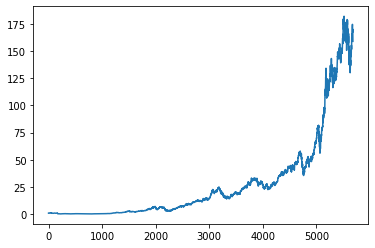

In [ ]:
plt.plot(df.Close)
#here we plotted the close graph

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100
#ma100 = Moving Avrage of past 100 days i.e mean of last 100 days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5678    154.0984
5679    154.0556
5680    153.9074
5681    153.7706
5682    153.6414
Name: Close, Length: 5683, dtype: float64

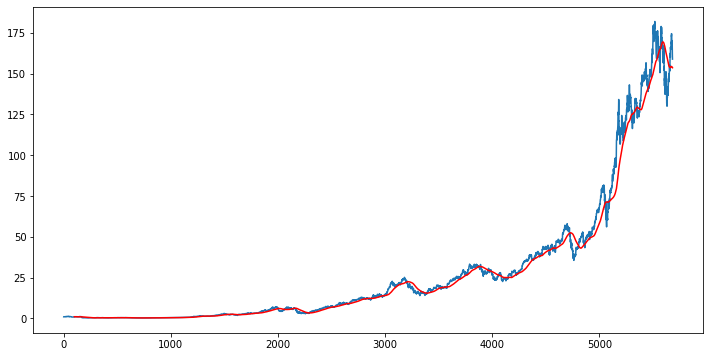

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
#here we plotted the Moving Average graph with the Close graph

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5678    160.70400
5679    160.80195
5680    160.86600
5681    160.93330
5682    160.98850
Name: Close, Length: 5683, dtype: float64

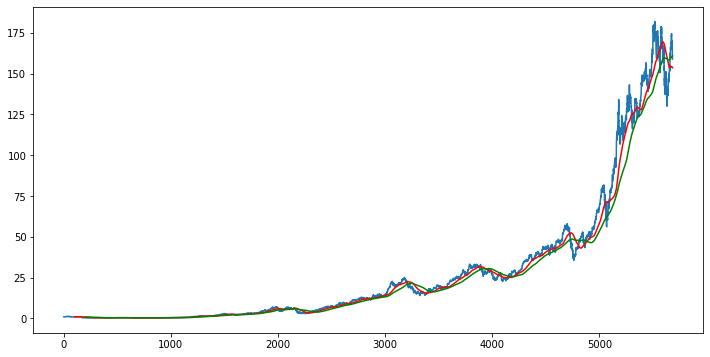

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
#here we plotted moving average of 200 days with ma100 days and close graph

In [ ]:
df.shape

(5683, 6)

Splitting data into training data and testing data

In [20]:
data_training = datareader.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = datareader.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

#training data includes 70% of the data and testing data includes 30% of the total data

(3978, 1)
(1705, 1)


In [21]:
data_training.head()

,Close
0,0.926339
1,0.895089
2,0.882254
3,0.922433
4,0.964286


In [22]:
data_testing.head()

,Close
3978,29.825001
3979,29.437500
3980,29.719999
3981,29.507500
3982,29.452499


Standardize the data

In [27]:
scaler= MinMaxScaler(feature_range=(0,1))
#it is an object to standardize the data

In [29]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
data_training_array.shape

(3978, 1)

In [31]:
x_train =[]
y_train =[]
#x_train = data of previous 100 days, #y_train = data to be predicted of 101th day
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

Building ML Model

In [35]:
model= Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
122/122 [==============================] - 37s 262ms/step - loss: 0.0193
Epoch 2/50
122/122 [==============================] - 31s 258ms/step - loss: 0.0044
Epoch 3/50
122/122 [==============================] - 32s 259ms/step - loss: 0.0039
Epoch 4/50
122/122 [==============================] - 30s 250ms/step - loss: 0.0034
Epoch 5/50
122/122 [==============================] - 30s 249ms/step - loss: 0.0035
Epoch 6/50
122/122 [==============================] - 30s 248ms/step - loss: 0.0031
Epoch 7/50
122/122 [==============================] - 30s 249ms/step - loss: 0.0033
Epoch 8/50
122/122 [==============================] - 30s 249ms/step - loss: 0.0028
Epoch 9/50
122/122 [==============================] - 30s 249ms/step - loss: 0.0029
Epoch 10/50
122/122 [==============================] - 30s 248ms/step - loss: 0.0027
Epoch 11/50
122/122 [==============================] - 30s 250ms/step - loss: 0.0027
Epoch 12/50
122/122 [==============================] - 30s 248ms/step - lo

Save the build model


In [39]:
model.save('keras_model.h5')

In [40]:
past_100_days = data_training.tail(100)

In [41]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [42]:
final_df.head()

,Close
0,31.650000
1,31.610001
2,31.500000
3,31.422501
4,30.642500


Standardize the input data

In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0568606 ],
       [0.0566097 ],
       [0.05591972],
       ...,
       [0.88464795],
       [0.87059752],
       [0.85510433]])

In [44]:
input_data.shape

(1805, 1)

provide values to test data


In [45]:
x_test = []
y_test = []
for i in range (100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [46]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1705, 100, 1)
(1705,)


Making Predictions

In [47]:
y_predicted = model.predict(x_test)

In [48]:
y_predicted.shape

(1705, 1)

Now as the predicted value is standardized convert it again into same value to visualize it properly

In [49]:
scaler.scale_

array([0.00627254])

In [50]:
scale_factor = 1/0.00627254
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

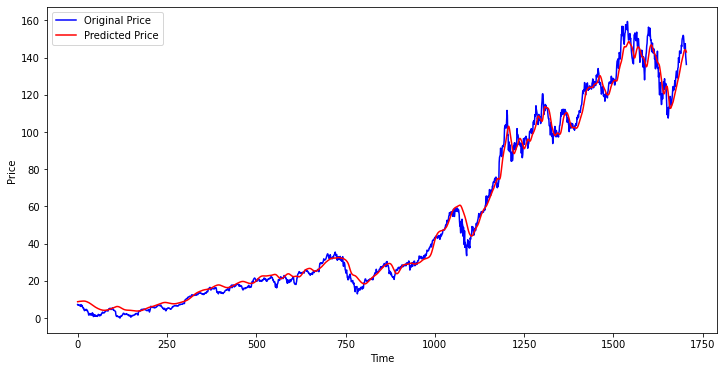

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()